In [6]:
#Importing the CIFAR-10 dataset from keras
from keras.datasets import cifar10
import matplotlib.pyplot as plt
 
(train_X,train_Y),(test_X,test_Y)=cifar10.load_data()

170500096/170498071 [==============================] - 3s 0us/step


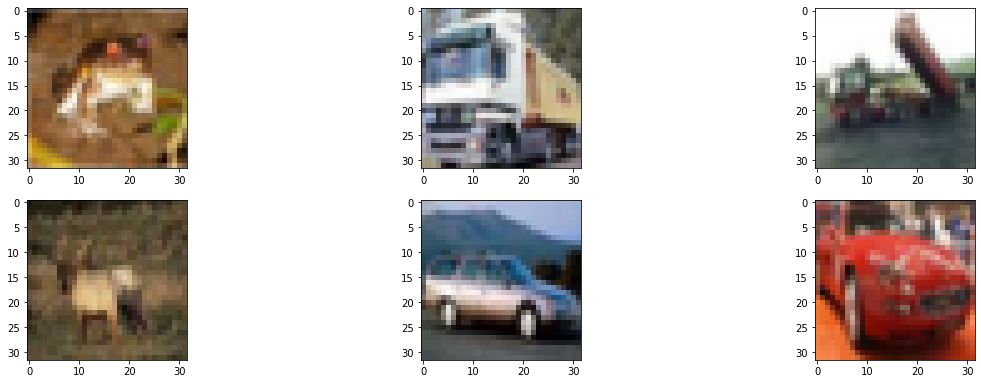

In [12]:
#Displaying first few images in the dataset
n=6
plt.figure(figsize=(20,10))
for i in range(n):
  plt.subplot(330+1+i)
  plt.imshow(train_X[i])
plt.show()

In [13]:
#Importing the required layers and modules to create our convolution neural net architecture
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import BatchNormalization
from keras.constraints import maxnorm
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

In [14]:
#Converting the pixel values of the dataset to float type and then normalizing them
train_x=train_X.astype('float32')
test_X=test_X.astype('float32')
 
train_X=train_X/255.0
test_X=test_X/255.0

In [15]:
#One-Hot Encoding for the target labels
train_Y=np_utils.to_categorical(train_Y)
test_Y=np_utils.to_categorical(test_Y)
 
num_classes=test_Y.shape[1]

In [16]:
#CNN Sequential Model
#Consists Dropout and Batch Normalization layers for regularization
model1 = Sequential()
model1.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model1.add(BatchNormalization())
model1.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D((2, 2)))
model1.add(Dropout(0.2))
model1.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model1.add(BatchNormalization())
model1.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D((2, 2)))
model1.add(Dropout(0.3))
model1.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model1.add(BatchNormalization())
model1.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D((2, 2)))
model1.add(Dropout(0.4))
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.5))
model1.add(Dense(num_classes, activation='softmax'))

In [17]:
#Compiling the model
#Adam optimizer
model1.compile(loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']) 

In [9]:
#Model Architecture for better understanding
from keras.utils.vis_utils import plot_model
plot_model(model1, to_file='model_plot.png')
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

In [18]:
#Training the model
history=model1.fit(train_X,train_Y, validation_data=(test_X,test_Y),
    epochs=50,batch_size=256)

Epoch 1/50
196/196 [==============================] - 418s 2s/step - loss: 2.2242 - accuracy: 0.3127 - val_loss: 3.5295 - val_accuracy: 0.1126
Epoch 2/50
196/196 [==============================] - 420s 2s/step - loss: 1.2683 - accuracy: 0.5506 - val_loss: 2.6925 - val_accuracy: 0.2350
Epoch 3/50
196/196 [==============================] - 418s 2s/step - loss: 1.0210 - accuracy: 0.6398 - val_loss: 1.0928 - val_accuracy: 0.6153
Epoch 4/50
196/196 [==============================] - 430s 2s/step - loss: 0.8838 - accuracy: 0.6855 - val_loss: 0.8377 - val_accuracy: 0.6931
Epoch 5/50
196/196 [==============================] - 422s 2s/step - loss: 0.7941 - accuracy: 0.7219 - val_loss: 0.6944 - val_accuracy: 0.7515
Epoch 6/50
196/196 [==============================] - 425s 2s/step - loss: 0.7330 - accuracy: 0.7436 - val_loss: 0.6800 - val_accuracy: 0.7612
Epoch 7/50
196/196 [==============================] - 429s 2s/step - loss: 0.6742 - accuracy: 0.7644 - val_loss: 0.7411 - val_accuracy: 0.7424

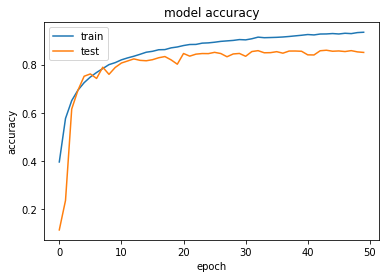

In [19]:
#Plotting Model Training
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [20]:
#Accuracy of the model on the test data
acc=model1.evaluate(test_X,test_Y)

313/313 [==============================] - 21s 66ms/step - loss: 0.5337 - accuracy: 0.8506


In [22]:
#Saving the weights of the model
model1.save("model1_cifar.h5")

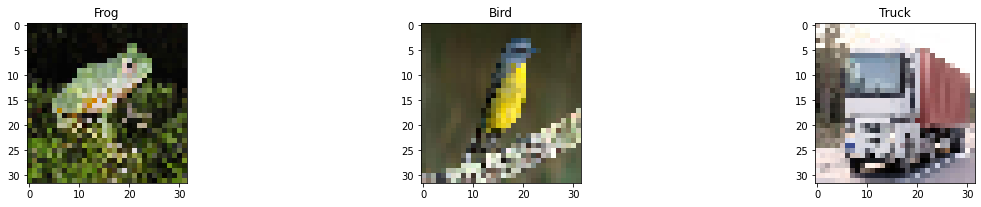

In [7]:
#Making a dictionary to map the output classes and make predictions from the model
results={
   0:'Aeroplane',
   1:'Automobile',
   2:'Bird',
   3:'Cat',
   4:'Deer',
   5:'Dog',
   6:'Frog',
   7:'Horse',
   8:'Ship',
   9:'Truck'
}

import numpy as np
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
pred=[]
image=[]
for i in range(3):
  img = load_img('test'+str(i)+'.jpg', target_size=(32, 32))
  image.append(img)
  # convert to array
  img = img_to_array(img)
  # reshape into a single sample with 3 channels
  img = img.reshape(1, 32, 32, 3)
  # prepare pixel data
  img = img.astype('float32')
  img = img / 255.0

  pred.extend(np.argmax(model1.predict(img), axis=-1))

#Plotting results
plt.figure(figsize=(20,10))
for i in range(3):
  plt.subplot(330+1+i)
  plt.imshow(image[i])
  plt.title(results[pred[i]])
plt.show()